# House Pricing Project 
#### The data set of this project is from a Kaggle competition, with actual data set from Ames, Iowa. The objective of this project is to make predictions to the house prices in the test data set.  By refine and training the model, to increase the accuracy of the prediction. 

### Starting with interpreting the data set.

##### Import Libraries.

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

##### Import the data set.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

### Data Exploration

##### Plot the data set to examine any outliers.

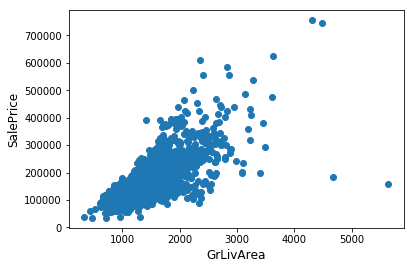

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.show()

##### Discover 2 outlier data points, with large living area but very low sale price, this indicates these outlier data points can be data input error. Dropping both of them will decrease them to interfere the predictive model training, also only dropping 2 out of a very large data set.

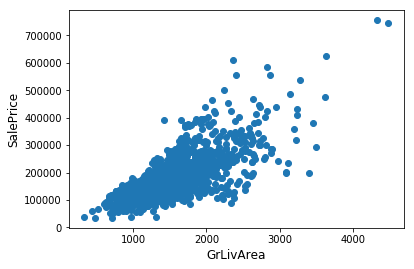

In [5]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.show()

##### The distribution graph of values for sale price, it is skewed to the left.

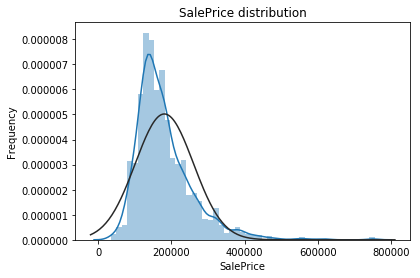

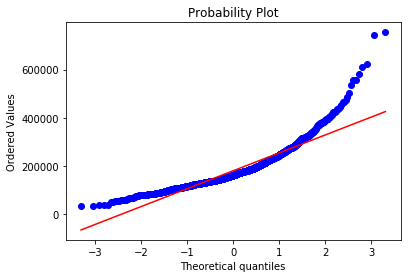

In [6]:
sns.distplot(train['SalePrice'] , fit = norm);

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

##### Use log transformationt o normalize 'SalePrice' column data.

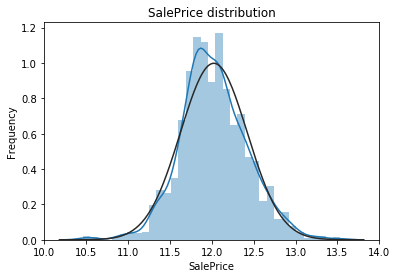

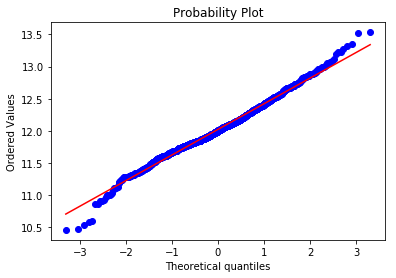

In [7]:
train["SalePrice"] = np.log(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

##### Concatenate train and test data set for data cleaning.

In [8]:
y_train = train.SalePrice.values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)

### Data Cleaning

##### Create a table to display the null values existence status in each colum.

In [9]:
null_data = (df.isnull().sum() / len(df)) * 100
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null_data})
missing_data

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

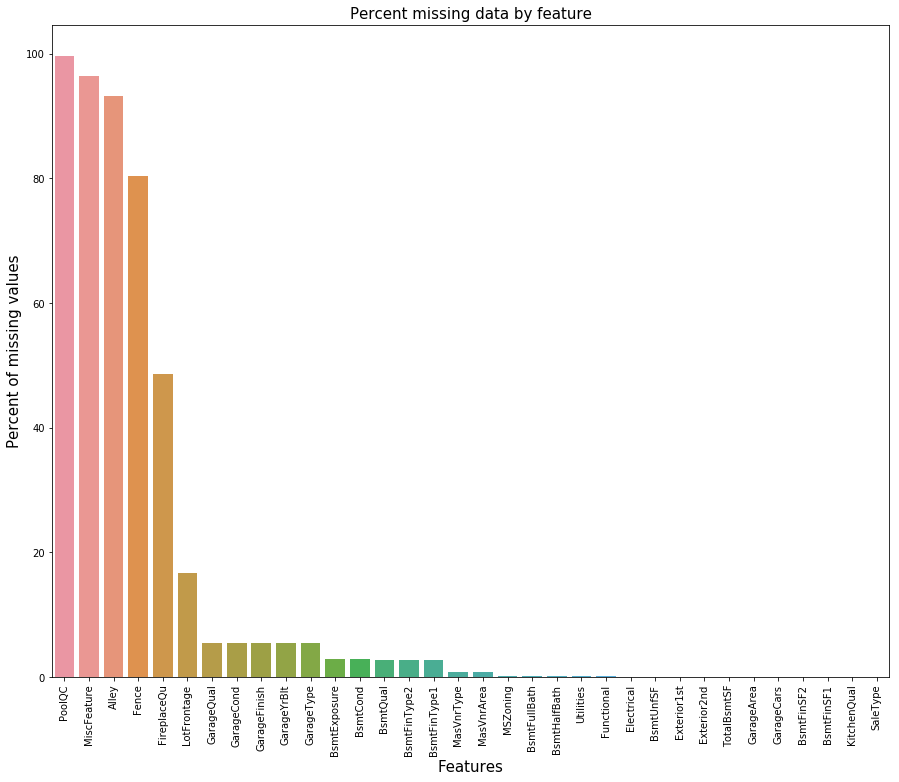

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_data.index, y=null_data);
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

##### Use correlation map to visualize the correlation between each feature and target variable 'SalePrice'.

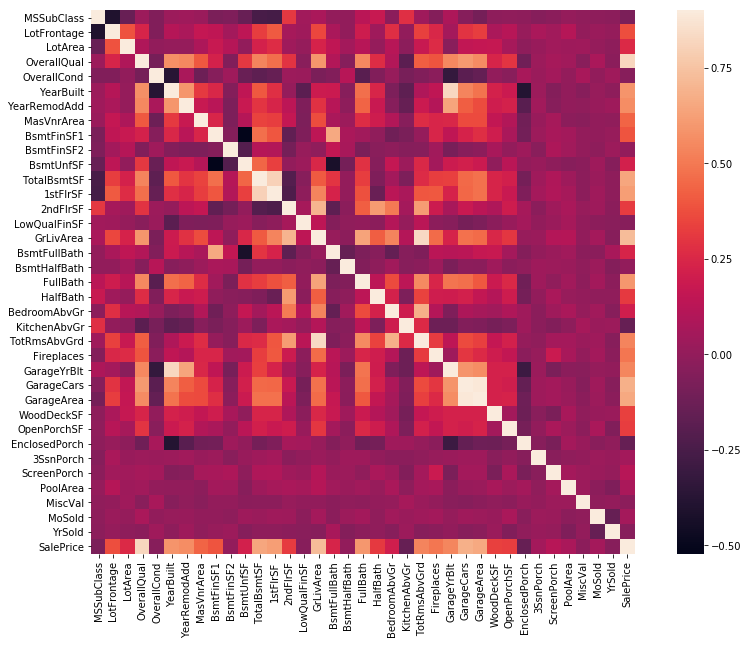

In [11]:
corrmat = train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, vmax=0.9, square=True);

##### Fill in the null value with proper data indication.

In [12]:
df["PoolQC"] = df["PoolQC"].fillna("NoPool")
df["MiscFeature"] = df["MiscFeature"].fillna("NoFeats")
df["Alley"] = df["Alley"].fillna("NoAlley")
df["Fence"] = df["Fence"].fillna("NoFence")
df["FireplaceQu"] = df["FireplaceQu"].fillna("NoFireplace")

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('NoBasement')

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)   
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('NoGarage')    
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
    
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSSubClass'] = df['MSSubClass'].fillna("None")

##### Use the median value to filled in the missing values in column 'LotFrontage'.

In [13]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

##### Use .mode function to fill in all other msising values.

In [14]:
df['MSZoning'] = df['MSZoning'].fillna("Typ")
df["Functional"] = df["Functional"].fillna(df['Functional'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

##### From data exploration, it indicates the 'AllPub' is the only value of the 'Utilities' feature, this feature can be dropped.

In [15]:
df = df.drop(['Utilities'], axis=1)

##### Examine if all missing values from data set had been cleaned up.

In [16]:
null_data = (df.isnull().sum() / len(df)) * 100
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null_data})
missing_data

,Missing Ratio


### Feature Engineering

##### Select the variables that has catergorical data but with numeric values, convert them into string and make dummy variables.

In [17]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

##### Use Label Encoding function to change the values in categorical variables into ordinal variables.

In [18]:
from sklearn.preprocessing import LabelEncoder

from scipy.special import boxcox1p


cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[col].values)) 
    df[col] = lbl.transform(list(df[col].values))
  

In [19]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

##### Below table shows the current data set has a skewed distribution, because some features are not catergorical data.

In [20]:
noncate_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[noncate_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew': skewed_feats})
skewness

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


##### Use Box Cox Transformation to normalize the highly skewed values.

In [21]:
skewness = skewness[abs(skewness) > 0.75]
print("There are", skewness.shape[0], "skewed numerical features to Box Cox transform")

skewed_features = skewness.index
lmbda = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lmbda)
    df[feat] += 1

There are 59 skewed numerical features to Box Cox transform


### Modeling

##### Import alogorithms and prepare modeling.

In [22]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

/Users/Nicky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
df = pd.get_dummies(df)

train_df = df[:len(train)]
test_df = df[len(train):]

##### Using K Fold and Cross Validation to split data set.

In [24]:
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

##### Since an ensemble of algorithms will be used to make the final prediction on the test set, a pipeline is used to incorporate the Robust Scaler, which handles outliers that may have not been handled.

In [25]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
print("RMSE for lasso:", rmsle_cv(lasso).mean())

RMSE for lasso: 0.111544870648


In [26]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
print("RMSE for elastic net:", rmsle_cv(ENet).mean())

RMSE for elastic net: 0.111563024342


In [27]:
KR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
print("RMSE for Kernel Ridge:", rmsle_cv(KR).mean())

RMSE for Kernel Ridge: 0.115072680418


In [28]:
GB = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
print("RMSE for Gradient Boosting:", rmsle_cv(GB).mean())

RMSE for Gradient Boosting: 0.115865678389


In [29]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2,seed=42, silent=1)
print("RMSE for XGB:", rmsle_cv(model_xgb).mean())

RMSE for XGB: 0.119098818674


##### Average the predictions of the models.

In [30]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

In [31]:
averaged_models = AveragingModels(models = (ENet, GB, KR, lasso))
score = rmsle_cv(averaged_models)

print("Average base model score:", score.mean())

Average base model score: 0.108467155923


In [32]:
averaged_models.fit(train_df.values, y_train)
train_pred = averaged_models.predict(train_df.values)
pred = averaged_models.predict(test_df.values)
np.sqrt(mean_squared_error(y_train, train_pred))

0.079455982385708973

In [33]:
model_xgb.fit(train_df, y_train)
xgb_train_pred = model_xgb.predict(train_df)
xgb_pred = model_xgb.predict(test_df)
np.sqrt(mean_squared_error(y_train, xgb_train_pred))

0.042171010161116129

In [34]:
print('RMSE score on train data:', np.sqrt(mean_squared_error(y_train,train_pred*0.70 + xgb_train_pred*0.30 )))

RMSE score on train data: 0.0664604695047


In [35]:
ensemble = pred*0.70 + xgb_pred*0.30 